##### Hello, MNIST

In [1]:
# import mnist dataset from sklearn
from sklearn.datasets import load_digits

In [3]:
# load_digits() is a short version of mnist dataset
"""
mnist = load_digits()
x, y = mnist['data'], mnist['target']

print(type(x), x.shape)
print(type(y), y.shape)
"""

<class 'numpy.ndarray'> (1797, 64)
<class 'numpy.ndarray'> (1797,)


In [4]:
# import mnist dataset from sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x, y = mnist['data'].values, mnist['target']

print(x.shape, y.shape)

(70000, 784) (70000,)


In [5]:
print(type(x))
print(type(y))
print(y.dtypes)
print([type(i) for i in y[:1]])

# since y' dtype is str, we need to convert it to float
y = y.astype(float)
print([type(i) for i in y[:1]])

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
category
[<class 'str'>]
[<class 'float'>]


In [6]:
# normalize x to keep our gradients manageable
x = x / 255

In [7]:
# to build a zero-classifier, make the label 1 when we have a zero, and 0 otherwise
import numpy as np
y_new = np.zeros(shape=y.shape)
y_new[np.where(y == 0.0)] = 1
y = y_new

In [16]:
# we can make our train/test split. we'll also transform the data into the shape we want, with each example in a column(instead of a row)
m = 60000
m_test = x.shape[0] - m

x_train, x_test = x[:m].T, x[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train[:,0].shape, y_train[:1,0].shape)
print()
print(x_train[:10, 0])
print(y_train[0, :10])

(784, 60000) (1, 60000) (784, 10000) (1, 10000)
(784,) (1,)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
# finally we shuffle the training set for good measure
np.random.seed(138)
shuffle_index = np.random.permutation(m)
x_train, y_train = x_train[:, shuffle_index], y_train[:, shuffle_index]
print(x_train.shape, y_test.shape)

(784, 60000) (1, 10000)


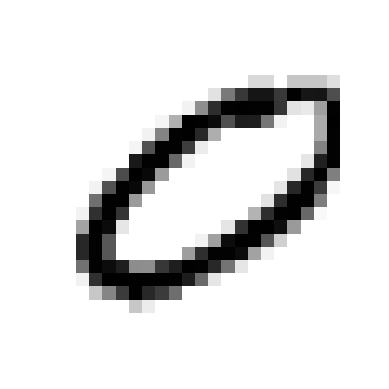

1.0


In [20]:
# take a look at a random image
import matplotlib
import matplotlib.pyplot as plt

i = 1
plt.imshow(x_train[:, i].reshape(28, 28), cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()
print(y_train[0][i])

##### Build & Train

In [21]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def compute_loss(Y, Y_hat):
    m = Y.shape[1]
    L = -(1.0/m) * (np.sum(np.multiply(np.log(Y_hat), Y)) + np.sum(np.multiply(np.log(1-Y_hat), (1-Y))))
    return L

In [37]:
learning_rate = 1

In [22]:
X, Y = x_train, y_train
print(X.shape, Y.shape)

(784, 60000) (1, 60000)


In [23]:
n_x = X.shape[0]    # number of features
m = X.shape[1]      # number of examples
print(n_x, m)

784 60000


In [27]:
W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1,1))
print(f"W.shape : {W.shape},  b.shape : {b.shape}")

W.shape : (784, 1),  b.shape : (1, 1)


In [34]:
Z = np.matmul(W.T, X) + b
print(f"Z.shape : {Z.shape}")

A = sigmoid(Z)
print(f"A.shape : {A.shape}")

print(f"(A-Y).T shape : {((A-Y).T).shape}")


dW = (1/m) * np.matmul(X, (A-Y).T)
print(f"dW.shape : {dW.shape}")

db = (1/m) * np.sum((A-Y)).reshape(-1,1)
print(f"db.shape : {db.shape}")
print(db)

Z.shape : (1, 60000)
A.shape : (1, 60000)
(A-Y).T shape : (60000, 1)
dW.shape : (784, 1)
db.shape : (1, 1)
[[0.38819289]]


In [35]:
compute_loss(Y, A)

0.6784013154196323

In [38]:
for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)
    
    cost = compute_loss(Y, A)
    
    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum((A-Y)).reshape(-1,1)
    
    W -= learning_rate * dW
    b -= learning_rate * db
    
    if (i % 100 == 0):
        print(f"Epoch {i:>3d}   cost : {cost}")
        
print(f"Final cost : {cost}}")

Epoch 0   cost : 0.6784013154196323
Epoch 100   cost : 0.041302908759714714
Epoch 200   cost : 0.03578437989110894
Epoch 300   cost : 0.03322549293126029
Epoch 400   cost : 0.031628739415190746
Epoch 500   cost : 0.03049178280959142
Epoch 600   cost : 0.02962165753217041
Epoch 700   cost : 0.028925362656828373
Epoch 800   cost : 0.02835107252343741
Epoch 900   cost : 0.02786688272412182
Epoch 1000   cost : 0.027451709456821065
Epoch 1100   cost : 0.027090875867479547
Epoch 1200   cost : 0.02677375567467287
Epoch 1300   cost : 0.026492416327870926
Epoch 1400   cost : 0.02624078932763677
Epoch 1500   cost : 0.026014137871112
Epoch 1600   cost : 0.025808701689659486
Epoch 1700   cost : 0.025621452389434335
Epoch 1800   cost : 0.025449920349893834
Epoch 1900   cost : 0.025292069445598375
f{Final cost : {cost}}
